In [1]:
from keras.models import load_model

model = load_model('GenderModel.h5')

Using TensorFlow backend.


In [3]:
TRAIN_DIR = "./data/train"
TEST_DIR = "./data/test"
IM_WIDTH = 198
IM_HEIGHT = 198

In [24]:
def plot_images(images,labels):
    n_cols = min(4,len(images))
    n_rows = len(images) // n_cols
    fig = plt.figure(figsize=(15,15))
    
    for i in range(n_rows * n_cols):
        sp = fig.add_subplot(n_rows,n_cols,i+1)
        plt.axis("off")
        plt.imshow(images[i],cmap=plt.cm.gray)
        sp.set_title(labels[i])
    plt.show()

In [6]:
from keras.preprocessing.image import ImageDataGenerator
test_data_gen = ImageDataGenerator(rescale=1./255)
batch_size = 32
test_gen = test_data_gen.flow_from_directory(TEST_DIR,
                                            target_size=(IM_WIDTH, IM_HEIGHT),
                                            class_mode="binary",
                                            batch_size=batch_size)

Found 4145 images belonging to 2 classes.


In [10]:
result = model.evaluate_generator(test_gen, steps=len(test_gen.filenames)//batch_size)


In [18]:
print("Test Accuracy :",end="")
print('%0.2f'%(result[1]*100) + " %")

Test Accuracy :85.15 %


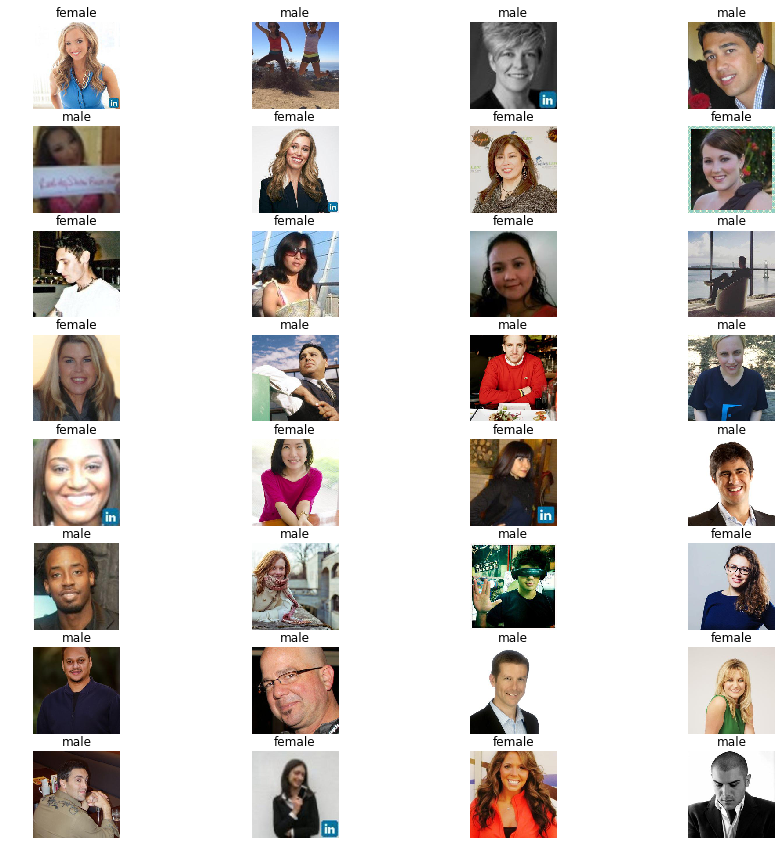

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
imgs,y_true = next(test_gen)
predictions = model.predict(imgs,batch_size=imgs.shape[0])
predictions_str = np.where(predictions.flatten()>0.5,"male","female")
plot_images(imgs,predictions_str)